In [1]:
import matplotlib.pyplot as plt
import SimpleITK as sitk
import numpy as np
import os

In [3]:
DATA_PARENT_DIR = '../Task1/brain/'
iterable_dir_list = sorted(os.listdir(DATA_PARENT_DIR), key=lambda x: x)
dataset_parent_dir = [os.path.join(DATA_PARENT_DIR, mri_path) for mri_path in iterable_dir_list]

In [7]:
parent_dir = dataset_parent_dir[0]
mri_img = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(parent_dir,'mr.nii.gz')))
# segment_img = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(parent_dir,'mr_segmented2.nii.gz')))
segment_img = sitk.GetArrayFromImage(sitk.ReadImage('../Task1/mr_segmented.nii.gz'))

In [22]:
from matplotlib.colors import ListedColormap
LIGHT_BLUE = '#00ffff'
ORANGE = '#ff8040'
PURPLE = '#8000ff'
GREEN = '#16a70b'
LIGHT_PINK = '#ff80c0'
DARK_GREEN = '#008100'
DARK_BLUE = '#0000ff'
NEON_PINK = '#ff00ff'
LIGHT_GREEN = '#00ff00'
GRAY = '#909091' #FIXME: match with image in Drive
TAN = '#ebda96'
LIGHT_RED = '#fa8072'
BLACK = '#000000ff'
BLACK_TRANSPARENT = '#00000000'

#               Light blue          orange              Purple                 Green                   light pink       dark green      dark blue         neon pink            light green      grey                    tan                 light red
RGB_VALUES = [(0, 255, 255, 255), (255, 128, 64, 255), (128, 0, 255, 255), (22, 167, 11, 255), (255, 128, 192, 255), (0, 129, 0, 255), (0, 0, 255, 255), (255, 0, 255, 255), (0, 255, 0, 255), (144, 144, 145, 255), (235, 218, 150, 255), (250, 128, 114, 255)]
RANGES = [[0, 0.5], [0.5, 1.5], [1.5, 2.5], [2.5, 3.5], [3.5, 4.5], [4.5, 5.5], [5.5, 6.5], [6.5, 7.5], [7.5, 8.5], [8.5, 9.5], [9.5, 10.5], [10.5, 11.5]]

def plot_mr_segment_sidebyside(image, segmented_image, slice_number=100):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.imshow(image[:,-slice_number,:], cmap='gray', interpolation='none')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(segmented_image[:,slice_number,:], cmap='gray', interpolation='none')
    rgba_colors = [BLACK_TRANSPARENT, LIGHT_PINK, ORANGE, GRAY, PURPLE, BLACK_TRANSPARENT, DARK_BLUE, NEON_PINK, LIGHT_GREEN, LIGHT_BLUE, BLACK_TRANSPARENT, LIGHT_RED]
    outline_list = [(250, 128, 114, 255), (0, 255, 255, 255), (0, 255, 0, 255), (255, 0, 255, 255), (0, 0, 255, 255), (128, 0, 255, 255), (144, 144, 145, 255), (255, 128, 64, 255), (255, 128, 192, 255)]
    outline_list = outline_list[::-1]
    for num, color in enumerate(rgba_colors):
        if color == BLACK_TRANSPARENT:
            continue
        cmap = ListedColormap([color])
        cmap.set_over((0, 0, 0, 0))
        cmap.set_under((0, 0, 0, 0))
        cmap.set_bad((0, 0, 0, 0))
        plt.imshow(segmented_image[:,slice_number,:], cmap=cmap, interpolation='none', vmin=RANGES[num][0], vmax=RANGES[num][1])
    plt.show()


def tissue_hist_plot(image):
    tissue_labels = [9, 10, 11] # skin, fat, muscle
    cortical_bone_label = 8
    soft_tissue = []
    cortical_bone = []
    plt.figure(figsize=(6,3))

    for z in range(image.shape[0]):
        soft_tissue.append(np.sum(np.isin(image[z, :, :], tissue_labels)))
        cortical_bone.append(np.sum(image[z, :, :] == cortical_bone_label))

    window_size = 5
    soft_tissue_smooth = np.convolve(soft_tissue, np.ones(window_size)/window_size, mode='same')
    plt.subplot(1,2,1)
    plt.plot(soft_tissue_smooth)
    plt.xlabel('soft tissue histogram in z direction')
    vals = list(enumerate(np.diff(soft_tissue_smooth)))
    sorted_by_second = sorted(vals, key=lambda tup: -tup[1])
    print("biggest derivative (slice, value):", sorted_by_second[:5])

    cortical_bone_smoothed = np.convolve(np.array(cortical_bone), np.ones(window_size)/window_size, mode='same')
    plt.subplot(1,2,2)
    plt.plot(cortical_bone_smoothed)
    plt.xlabel('cortical bone histogram in z direction')
    plt.show()

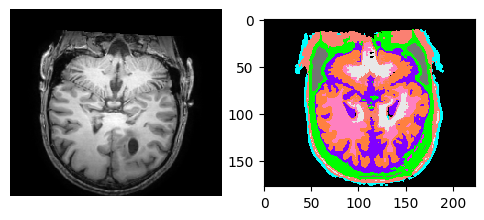

biggest derivative (slice, value): [(17, 606.0), (18, 536.0), (19, 517.2000000000007), (16, 503.59999999999945), (15, 485.40000000000055)]


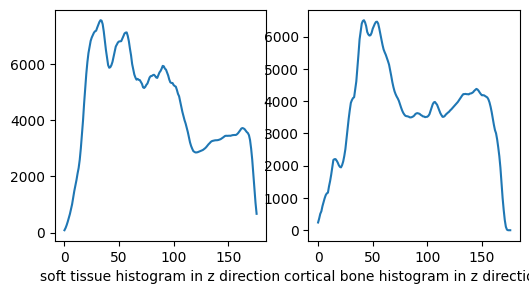

(None, None)

In [23]:
plot_mr_segment_sidebyside(mri_img, segment_img), tissue_hist_plot(segment_img)